# Pandas - dataset exploration
## 

### Let's import the dataset.
#### Dataset Link: https://data.ontario.ca/dataset/ontario-covid-19-outbreaks-data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df = pd.read_csv('ongoing_outbreaks_phu.csv')

### 
### Check some of the data

In [2]:
df.head()

,date,phu_name,phu_num,outbreak_group,number_ongoing_outbreaks
0,2020-11-01,BRANT COUNTY,2227,4 Workplace,1
1,2020-11-01,BRANT COUNTY,2227,1 Congregate Care,2
2,2020-11-01,CHATHAM-KENT,2240,5 Recreational,1
3,2020-11-01,CHATHAM-KENT,2240,6 Other/Unknown,1
4,2020-11-01,CHATHAM-KENT,2240,4 Workplace,1


### 
### Check the shape of the data

In [3]:
df.shape

(25682, 5)

#### 
#### Check for any null values

In [4]:
df.isnull().sum()

date                        0
phu_name                    0
phu_num                     0
outbreak_group              0
number_ongoing_outbreaks    0
dtype: int64

#### We have no null values to takle with..

## ---------------------------------------------------------------------------------------------
## 1.) From which date to which date data is collected.?

In [5]:
print("Data stored from date: ",min(df['date']))
print("To date:",max(df['date']))

Data stored from date:  2020-11-01
To date: 2021-06-12


## -------------------------------------------------------------------------------------------------
## 2.) On which date and in which city most number of outbreak occured on .?

In [6]:
df[df['number_ongoing_outbreaks'] == df['number_ongoing_outbreaks'].max()]

,date,phu_name,phu_num,outbreak_group,number_ongoing_outbreaks
19194,2021-04-14,TORONTO,3895,3 Education,123


### We can see that in Toronto on date 2021-04-14 the highest number of outbreak i.e 123 occured.

### 
### Let's check the least number of outbreak list

In [7]:
df[df['number_ongoing_outbreaks'] == df['number_ongoing_outbreaks'].min()]

,date,phu_name,phu_num,outbreak_group,number_ongoing_outbreaks
0,2020-11-01,BRANT COUNTY,2227,4 Workplace,1
2,2020-11-01,CHATHAM-KENT,2240,5 Recreational,1
3,2020-11-01,CHATHAM-KENT,2240,6 Other/Unknown,1
4,2020-11-01,CHATHAM-KENT,2240,4 Workplace,1
5,2020-11-01,CITY OF HAMILTON,2237,3 Education,1
...,...,...,...,...,...
25673,2021-06-12,WELLINGTON-DUFFERIN-GUELPH,2266,2 Congregate Living,1
25674,2021-06-12,WINDSOR-ESSEX COUNTY,2268,5 Recreational,1
25676,2021-06-12,WINDSOR-ESSEX COUNTY,2268,3 Education,1
25677,2021-06-12,WINDSOR-ESSEX COUNTY,2268,2 Congregate Living,1


### Most of the time Public Health Unit notes number of outbreak as 1.

## --------------------------------------------------------------------------------------------------
## 3.) Which Outbreak group occured more time.?

In [8]:
df['outbreak_group'].value_counts(sort=True)

1 Congregate Care      5692
4 Workplace            5502
2 Congregate Living    4294
3 Education            4218
5 Recreational         3901
6 Other/Unknown        2075
Name: outbreak_group, dtype: int64

In [9]:
df['outbreak_group'].value_counts()[df['outbreak_group'].value_counts()==df['outbreak_group'].value_counts().max()]

1 Congregate Care    5692
Name: outbreak_group, dtype: int64

In [10]:
df['outbreak_group'].value_counts()[df['outbreak_group'].value_counts()==df['outbreak_group'].value_counts().min()]

6 Other/Unknown    2075
Name: outbreak_group, dtype: int64

### We can see that, Congregate Care was the reason of the outbreak for the 5692 times, which is the highest.
### And Other/Unknown group was the reason of the outbreak for the 2075mes, which is the lowest.

## -----------------------------------------------------------------------------------------------
## 4.) Health unit name with number of times it was reported

In [11]:
df['phu_name'].value_counts(sort=True)

PEEL REGION                                1307
YORK REGION                                1280
TORONTO                                    1266
DURHAM REGION                              1180
CITY OF HAMILTON                           1176
MIDDLESEX-LONDON                           1157
CITY OF OTTAWA                             1139
HALTON REGION                              1122
WATERLOO REGION                            1107
NIAGARA REGION                             1095
SIMCOE MUSKOKA DISTRICT                    1082
WELLINGTON-DUFFERIN-GUELPH                 1038
WINDSOR-ESSEX COUNTY                        946
BRANT COUNTY                                802
OXFORD ELGIN-ST.THOMAS                      766
SUDBURY AND DISTRICT                        760
EASTERN ONTARIO                             732
THUNDER BAY DISTRICT                        696
HALDIMAND-NORFOLK                           681
KINGSTON, FRONTENAC, LENNOX & ADDINGTON     609
LEEDS, GRENVILLE AND LANARK DISTRICT    

### 
### Most reported Health unit

In [12]:
df['phu_name'].value_counts()[df['phu_name'].value_counts()==df['phu_name'].value_counts().max()]

PEEL REGION    1307
Name: phu_name, dtype: int64

### Peel Region health unit was highest affected and reported 1307 times.

### Least reported Health unit

In [13]:
df['phu_name'].value_counts()[df['phu_name'].value_counts()==df['phu_name'].value_counts().min()]

NORTH BAY PARRY SOUND DISTRICT    174
Name: phu_name, dtype: int64

### NORTH BAY PARRY SOUND DISTRICT health unit was least affected and reported 174 times.

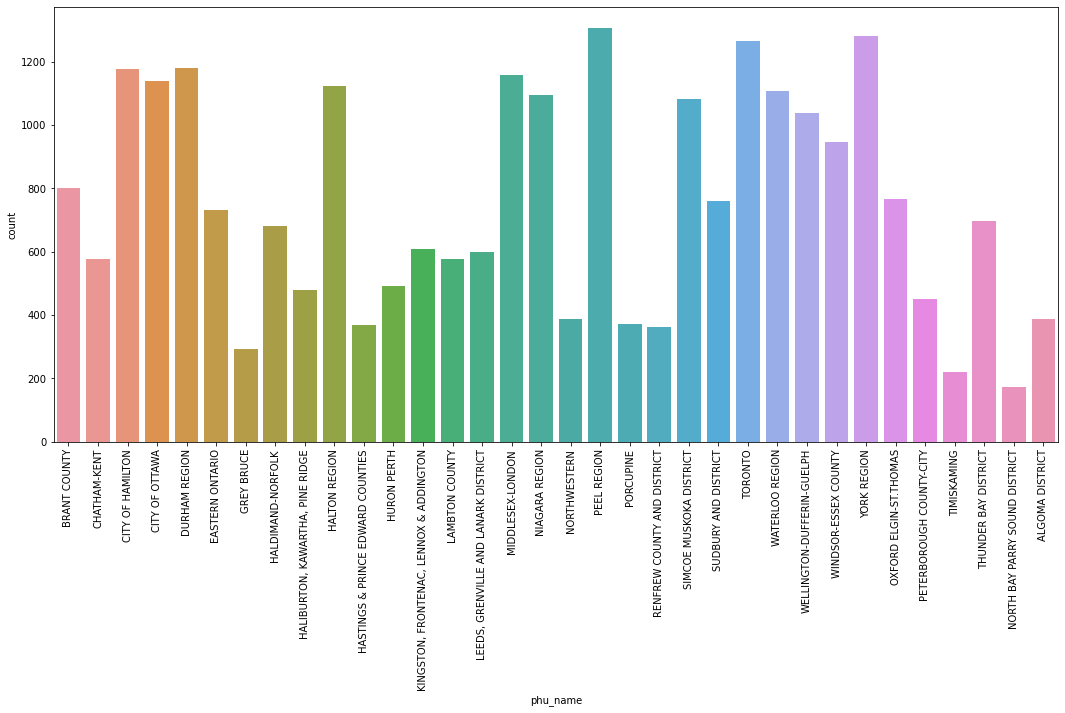

In [14]:
plt.figure(figsize=(18,8))

sns.countplot(df['phu_name'])
plt.xticks(rotation=90);

### -------------------------------------------------------------------------------------------------------------
## 5.) On which date the most reports were found.?

In [15]:
datecount = df['date'].value_counts()

maxdate = datecount[df['date'].value_counts()==df['date'].value_counts().max()]
print(maxdate)

2021-01-12    137
Name: date, dtype: int64


### On 2021-01-12 date, there were record 137 reports.
#### 

In [16]:
mindate = datecount[df['date'].value_counts()==df['date'].value_counts().min()]
print(mindate)

2021-06-12    70
Name: date, dtype: int64


### On 2021-06-12 date, there were least 70 reports.

## ----------------------------------------------------------------------------------
## 6.) Reports in every month

In [17]:
df['date']= pd.to_datetime(df['date']) 

print("List of reports per month..\n")
print(df['date'].dt.month.value_counts(sort=False))

List of reports per month..

1     3900
2     2912
3     3644
4     3730
5     3473
6      968
11    3179
12    3876
Name: date, dtype: int64
